# Question Q3

*Question*: How much percentage of effort do you think is spent in each of the seven ML life cycle stages?

*Answer Type*: Multiple Numerical

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
ml_stages = {
    'Q3_ML_Life_Cycle_Effort_Problem_Understanding': 'Problem Understanding',
    'Q3_ML_Life_Cycle_Effort_Data_Collection': 'Data Collection',
    'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing': 'Data Pre-Processing',
    'Q3_ML_Life_Cycle_Effort_Model_Creation': 'Model Creation',
    'Q3_ML_Life_Cycle_Effort_Model_Evaluation': 'Model Evaluation',
    'Q3_ML_Life_Cycle_Effort_Model_Deployment': 'Model Deployment',
    'Q3_ML_Life_Cycle_Effort_Model_Monitoring': 'Model Monitoring'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q3_ML_Life_Cycle_Effort_Problem_Understanding', 'Q3_ML_Life_Cycle_Effort_Data_Collection',
'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', 'Q3_ML_Life_Cycle_Effort_Model_Creation', 
'Q3_ML_Life_Cycle_Effort_Model_Evaluation', 'Q3_ML_Life_Cycle_Effort_Model_Deployment',
'Q3_ML_Life_Cycle_Effort_Model_Monitoring']].head()

,Q3_ML_Life_Cycle_Effort_Problem_Understanding,Q3_ML_Life_Cycle_Effort_Data_Collection,Q3_ML_Life_Cycle_Effort_Data_Pre-Processing,Q3_ML_Life_Cycle_Effort_Model_Creation,Q3_ML_Life_Cycle_Effort_Model_Evaluation,Q3_ML_Life_Cycle_Effort_Model_Deployment,Q3_ML_Life_Cycle_Effort_Model_Monitoring
0,5,20,30,25,12,5,3
1,30,12,12,12,12,12,10
2,20,10,15,20,5,15,15
3,30,10,10,25,10,15,0
4,15,10,10,15,15,25,10


In [6]:
# cleaning data in all Q3 columns
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Problem_Understanding', "-66", "0", "eq")
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Data_Collection', "-66", "0", "eq")
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', "-66", "0", "eq")
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Model_Creation', "-66", "0", "eq")
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Model_Evaluation', "-66", "0", "eq")
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Model_Deployment', "-66", "0", "eq")
dataframe_obj.replace_value_by_condition(
    'Q3_ML_Life_Cycle_Effort_Model_Monitoring', "-66", "0", "eq")


In [7]:
# convert column to integer - if you read before this line, you will get an string like '14'
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Problem_Understanding": int}, errors='raise') 
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Data_Collection": int}, errors='raise') 
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Data_Pre-Processing": int}, errors='raise') 
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Model_Creation": int}, errors='raise') 
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Model_Evaluation": int}, errors='raise') 
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Model_Deployment": int}, errors='raise') 
dataframe_obj.df = dataframe_obj.df.astype({"Q3_ML_Life_Cycle_Effort_Model_Monitoring": int}, errors='raise') 

In [8]:
indexes = ['Problem Understanding', 'Data Collection', 'Data Pre-Processing', 
           'Model Creation and Training', 'Model Evaluation', 'Model Deployment', 'Model Monitoring']
values = [
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Problem_Understanding'].mean(),
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Data_Collection'].mean(),
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Data_Pre-Processing'].mean(),
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Creation'].mean(),
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Evaluation'].mean(),
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Deployment'].mean(),
    dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Monitoring'].mean()
]
chart_positions = [1/(i + 1)  for i in range(len(indexes))] # decreasing

In [9]:
# compute total of unique answers in this question (all have the same length)
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Problem_Understanding'])
total_answers = 'N = ' + str(len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Problem_Understanding']))

In [10]:
# plot object
q3_plot = PlotUtils(pd.DataFrame(
    data={'Effort': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


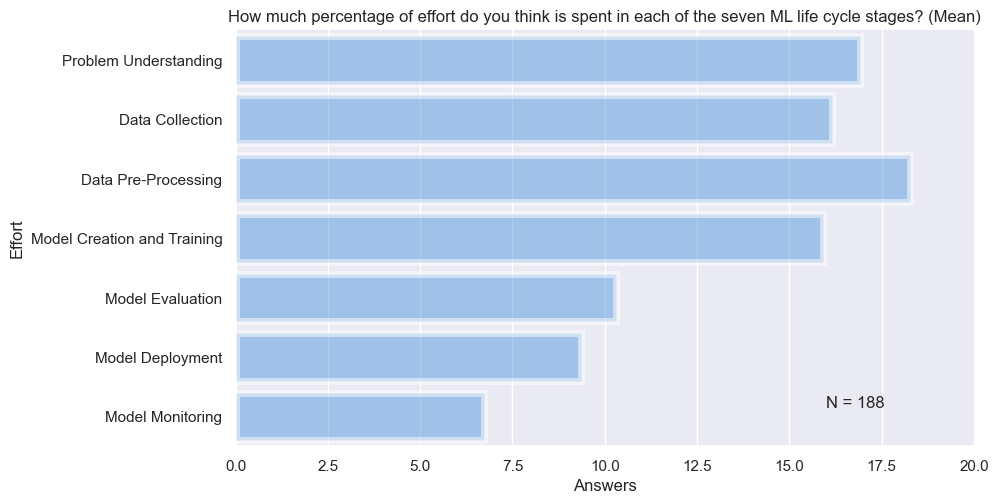

In [11]:
q3_plot.single_barplot(x_axis="Answers", y_axis="Effort",
                       title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages? (Mean)",
                       x_label="Answers", y_label="Effort", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

#### Problem Understanding

In [12]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Problem_Understanding'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Problem_Understanding'])

In [13]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_problem_understanding_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [14]:
bootstrapped_problem_understanding_list_data = bootstrapping_problem_understanding_obj.bootstrapping_numerical_fields()

#### Data Collection

In [15]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Data_Collection'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Data_Collection'])

In [16]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_data_collection_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [17]:
bootstrapped_data_collection_list_data = bootstrapping_data_collection_obj.bootstrapping_numerical_fields()

#### Data Pre-Processing

In [18]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Data_Pre-Processing'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Data_Pre-Processing'])

In [19]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_data_preprocessing_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [20]:
bootstrapped_data_preprocessing_list_data = bootstrapping_data_preprocessing_obj.bootstrapping_numerical_fields()

#### Model Creation and Training

In [21]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Creation'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Creation'])

In [22]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_model_creation_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [23]:
bootstrapped_model_creation_list_data = bootstrapping_model_creation_obj.bootstrapping_numerical_fields()

#### Model Evaluation

In [24]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Evaluation'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Evaluation'])

In [25]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_model_evaluation_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [26]:
bootstrapped_model_evaluation_list_data = bootstrapping_model_evaluation_obj.bootstrapping_numerical_fields()

#### Model Deployment

In [27]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Deployment'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Deployment'])

In [28]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_model_deployment_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [29]:
bootstrapped_model_deployment_list_data = bootstrapping_model_deployment_obj.bootstrapping_numerical_fields()

#### Model Monitoring

In [30]:
# each ML stage has a different distribution of answers
valid_answers_list = list(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Monitoring'])
total_answers_int = len(dataframe_obj.df['Q3_ML_Life_Cycle_Effort_Model_Monitoring'])

In [31]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_model_monitoring_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [32]:
bootstrapped_model_monitoring_list_data = bootstrapping_model_monitoring_obj.bootstrapping_numerical_fields()

#### Chart

In [36]:
print(len(bootstrapped_problem_understanding_list_data['population']))
print(len(bootstrapped_data_collection_list_data['population']))
print(len(bootstrapped_data_preprocessing_list_data['population']))
print(len(bootstrapped_model_creation_list_data['population']))
print(len(bootstrapped_model_evaluation_list_data['population']))
print(len(bootstrapped_model_deployment_list_data['population']))
print(len(bootstrapped_model_monitoring_list_data['population']))

188
188
188
188
188
188
188


In [39]:
indexes = []
values = []
chart_positions = []
for problem_understanding, data_collection, data_preprocessing, model_creation, model_evaluation, model_deployment, model_monitoring in zip(bootstrapped_problem_understanding_list_data['population'], bootstrapped_data_collection_list_data['population'], bootstrapped_data_preprocessing_list_data['population'], bootstrapped_model_creation_list_data['population'], bootstrapped_model_evaluation_list_data['population'], bootstrapped_model_deployment_list_data['population'], bootstrapped_model_monitoring_list_data['population']):
    indexes.extend(['Problem Understanding', 'Data Collection', 'Data Pre-Processing', 'Model Creation and Training', 
                    'Model Evaluation', 'Model Deployment', 'Model Monitoring'])
    values.extend([problem_understanding, data_collection, data_preprocessing, model_creation, model_evaluation, model_deployment, model_monitoring])
    chart_positions.extend([7, 6, 5, 4, 3, 2, 1])

In [40]:
# plot object for bootstrapped data
q3_boot_plot = PlotUtils(pd.DataFrame(
    data={'Effort': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


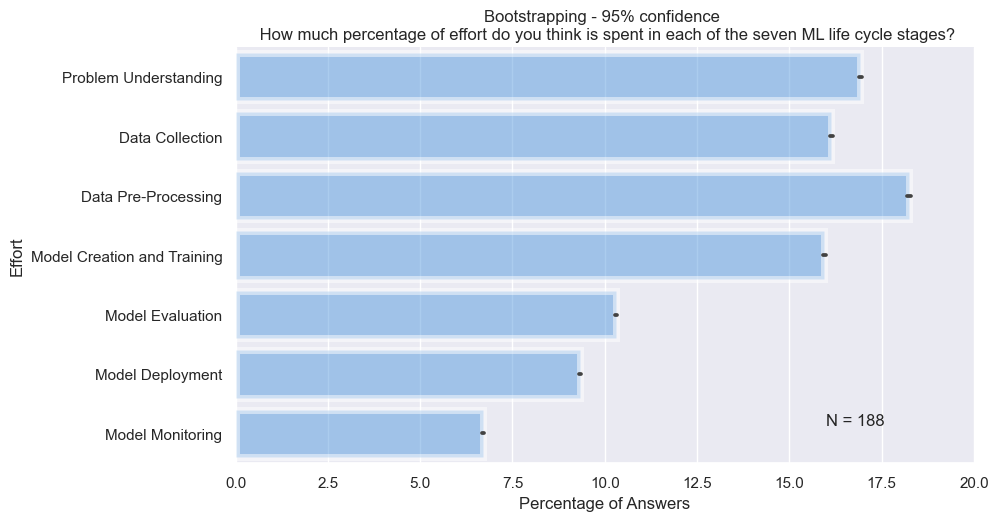

In [41]:
q3_boot_plot.single_barplot(x_axis="Value", y_axis="Effort", 
                       title="Bootstrapping - 95% confidence \n How much percentage of effort do you think is spent in each of the seven ML life cycle stages?",
                       x_label="Percentage of Answers", y_label="Effort", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [42]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
print(f"Problem Understanding:: {bootstrapped_problem_understanding_list_data['confidence']}")
print(f"Data Collection:: {bootstrapped_data_collection_list_data['confidence']}")
print(f"Data Pre-Processing:: {bootstrapped_data_preprocessing_list_data['confidence']}")
print(f"Model Creation:: {bootstrapped_model_creation_list_data['confidence']}")
print(f"Model Evaluation:: {bootstrapped_model_evaluation_list_data['confidence']}")
print(f"Model Deployment:: {bootstrapped_model_deployment_list_data['confidence']}")
print(f"Model Monitoring:: {bootstrapped_model_monitoring_list_data['confidence']}")

Option: (Lower Value, Mean, Upper Value)
Problem Understanding:: (16.87607837185604, 16.91863829787234, 16.961198223888644)
Data Collection:: (16.093071962065725, 16.135702127659574, 16.178332293253423)
Data Pre-Processing:: (18.18702723599222, 18.24222340425532, 18.29741957251842)
Model Creation:: (15.907878568960713, 15.947069148936171, 15.986259728911628)
Model Evaluation:: (10.272293041551658, 10.297303191489362, 10.322313341427067)
Model Deployment:: (9.314178647475924, 9.34056914893617, 9.366959650396417)
Model Monitoring:: (6.688080689566775, 6.7080957446808505, 6.728110799794926)


In [48]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
print(f"Problem Understanding:: P = {round(bootstrapped_problem_understanding_list_data['confidence'][1], 3)} [{round(bootstrapped_problem_understanding_list_data['confidence'][0], 3)}, {round(bootstrapped_problem_understanding_list_data['confidence'][2], 3)}]")
print(f"Data Collection:: P = {round(bootstrapped_data_collection_list_data['confidence'][1], 3)}  [{round(bootstrapped_data_collection_list_data['confidence'][0], 3)}, {round(bootstrapped_data_collection_list_data['confidence'][2], 3)}]")
print(f"Data Pre-Processing:: P = {round(bootstrapped_data_preprocessing_list_data['confidence'][1], 3)} [{round(bootstrapped_data_preprocessing_list_data['confidence'][0], 3)}, {round(bootstrapped_data_preprocessing_list_data['confidence'][2], 3)}]")
print(f"Model Creation:: P = {round(bootstrapped_model_creation_list_data['confidence'][1], 3)} [{round(bootstrapped_model_creation_list_data['confidence'][0], 3)}, {round(bootstrapped_model_creation_list_data['confidence'][2], 3)}]")
print(f"Model Evaluation:: P = {round(bootstrapped_model_evaluation_list_data['confidence'][1], 3)} [{round(bootstrapped_model_evaluation_list_data['confidence'][0], 3)}, {round(bootstrapped_model_evaluation_list_data['confidence'][2], 3)}]")
print(f"Model Deployment:: P = {round(bootstrapped_model_deployment_list_data['confidence'][1], 3)} [{round(bootstrapped_model_deployment_list_data['confidence'][0], 3)}, {round(bootstrapped_model_deployment_list_data['confidence'][2], 3)}]")
print(f"Model Monitoring:: P = {round(bootstrapped_model_monitoring_list_data['confidence'][1], 3)} [{round(bootstrapped_model_monitoring_list_data['confidence'][0], 3)}, {round(bootstrapped_model_monitoring_list_data['confidence'][2], 3)}]")

Option: (Lower Value, Mean, Upper Value)
Problem Understanding:: P = 16.919 [16.876, 16.961]
Data Collection:: P = 16.136  [16.093, 16.178]
Data Pre-Processing:: P = 18.242 [18.187, 18.297]
Model Creation:: P = 15.947 [15.908, 15.986]
Model Evaluation:: P = 10.297 [10.272, 10.322]
Model Deployment:: P = 9.341 [9.314, 9.367]
Model Monitoring:: P = 6.708 [6.688, 6.728]
